In [132]:
# First make sure we have the correct imports at the top of your notebook
import datetime as dt  # This is the correct import

# Get the most active station ID
most_active_station_id = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).\
    first()[0]

# Handle the date conversion
# First make sure most_recent_date is a datetime object
if isinstance(most_recent_date, str):
    most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate one year ago date using datetime correctly
one_year_ago = dt.datetime(most_recent_date.year - 1, most_recent_date.month, most_recent_date.day)
# Query the last 12 months of temperature data for the most active station
temperature_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= one_year_ago.strftime('%Y-%m-%d')).\
    all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])

# Verify the data
print("First few rows of temperature data:")
print(df.head())

First few rows of temperature data:
         date  tobs
0  2016-08-23  77.0
1  2016-08-24  77.0
2  2016-08-25  80.0
3  2016-08-26  80.0
4  2016-08-27  75.0


In [72]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [74]:
import numpy as np
import pandas as pd
import datetime as timedelta

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [79]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [81]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with= engine)

In [83]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [85]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
most_recent_date = session.query(func.max(measurement.date)).scalar()

print(f"The most recent date is: {most_recent_date}")

The most recent date is: 2017-08-23


In [92]:
# Calculate the date one year from the last date in the dataset.
# Perform a query to retrieve the data and precipitation scores.
# Save the query results as a Pandas DataFrame and explicitly set the column names.
# Sort the DataFrame by date.
# Use Pandas Plotting with Matplotlib to plot the data.

In [94]:
from datetime import timedelta
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [140]:
# Calculate the date one year from the last date in data set.
date = dt.date(most_recent_date.year -1, most_recent_date.month, most_recent_date.day)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the DataFrame by date
df_sort = df.sort_values(by='date')

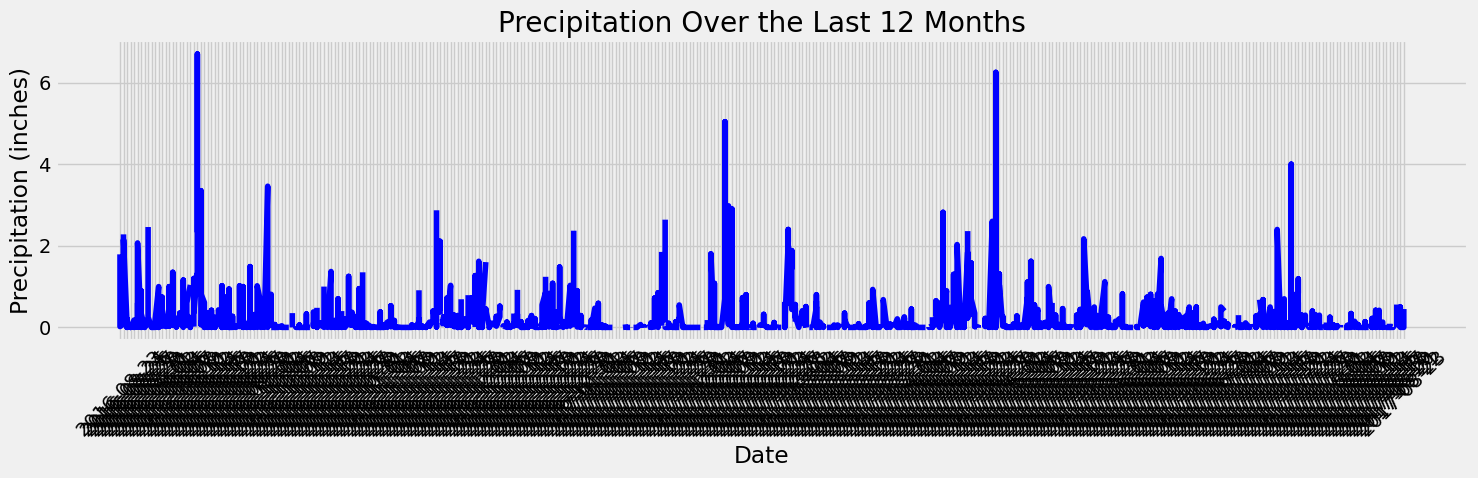

In [98]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(15, 5))
plt.plot(df_sort['date'], df_sort['precipitation'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count() 

9

In [102]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station,func.count(measurement.id)]
most_active_stations = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active_station = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
most_active_station

(54.0, 85.0, 71.66378066378067)

In [136]:
# Using the most active station id - First get the most active station ID
most_active_station_id = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).\
    first()[0]  # Get just the station ID string

# Calculate the date one year from the last date in data set
# First make sure most_recent_date is a datetime object
if isinstance(most_recent_date, str):
    most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate one year ago date
one_year_ago = dt.datetime(most_recent_date.year - 1, most_recent_date.month, most_recent_date.day)

# Query the last 12 months of temperature data for the most active station
temperature_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= one_year_ago.strftime('%Y-%m-%d')).\
    all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])

# Optional: Display first few rows to verify data
print("First few rows of temperature data:")
print(df.head())

# Optional: Display basic statistics
print("\nBasic statistics of temperature data:")
print(df.describe())

First few rows of temperature data:
         date  tobs
0  2016-08-23  77.0
1  2016-08-24  77.0
2  2016-08-25  80.0
3  2016-08-26  80.0
4  2016-08-27  75.0

Basic statistics of temperature data:
             tobs
count  352.000000
mean    73.107955
std      4.733315
min     59.000000
25%     70.000000
50%     74.000000
75%     77.000000
max     83.000000


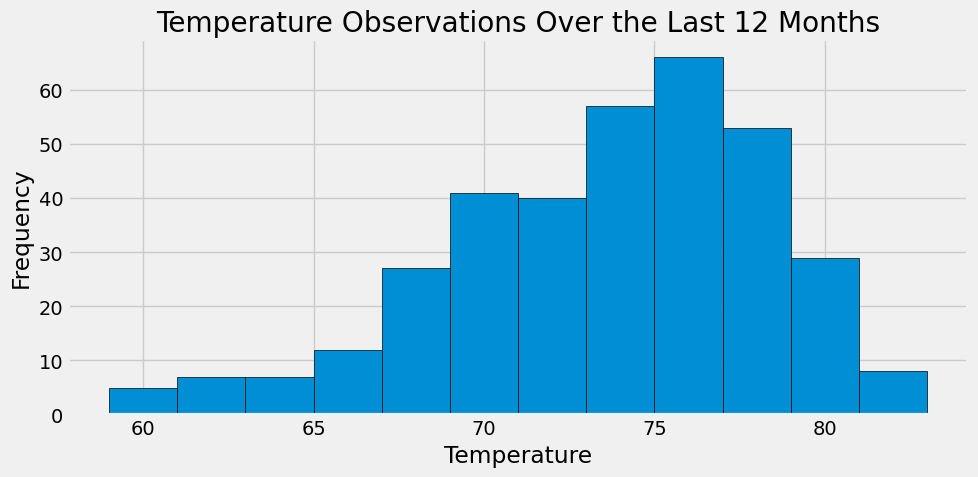

In [146]:
# Plot the results as a histogram
plt.figure(figsize=(10, 5))
plt.hist(df['temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations Over the Last 12 Months')
plt.tight_layout()
plt.show()

# Close Session

In [148]:
# Close Session
session.close()